This notebook belongs the AI Image exam EPITA AIS 2021 JULY 16

## Table of Contents
*   Intro to Dataset
*   Understanding of data
*   Load Data
*   Visualize Data
*   Understanding the FEN/ lable notations
*   Data Processing/ Augumentation
*   Dimensionality Reduction
*   Modelization
*   Performance

### Intro to Dataset

#### GOAL
The goal of the project is to build a model able to generate FEN description based on a schematic image of a chess board.
#### link about FEN notations
https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation

100000 images of a randomly generated chess positions of 5-15 pieces (2 kings and 3-13 pawns/pieces)
Images were generated using 28 styles of chess boards and 32 styles of chess pieces totaling 896 board/piece style combination


All images are 400 by 400 pixels.

    Training set: 80000 images
    Test set: 20000 images

Pieces were generated with the following probability distribution:

    30% for Pawn
    20% for Bishop
    20% for Knight
    20% for Rook
    10% for Queen

2 Kings are guaranteed to be on the board.

##### NECESSARY LIBRARIES 

In [33]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img

## Understanding Dataset
### Load Data

In [13]:
train = glob.glob("/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/train/*.jpeg")
test = glob.glob("/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/test/*.jpeg")

In [15]:
train[0]

'/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/train/7N-6p1-K5k1-7r-B3R3-3b1r2-2q5-B2b1N2.jpeg'

In [16]:
test[0]

'/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/test/7k-8-2K3b1-3PB3-R4B2-PB1P4-7b-B1R5.jpeg'

Looks like the lables (FEN Notations) are in names of each images in both train and test data, we need to extract those lable details from each filename and create a target lable for each images 

In [20]:
#this function takes the filename as an argument and use os package to get the filename 
# eg '7N-6p1-K5k1-7r-B3R3-3b1r2-2q5-B2b1N2.jpeg'
# and stores it in name 'base' and returns base[0] which is the filename without .jpeg 
# eg 7N-6p1-K5k1-7r-B3R3-3b1r2-2q5-B2b1N2


def fen_from_filename(filename):
  base = os.path.basename(filename)
  return os.path.splitext(base)[0]

In [28]:
print(train[0])
print(test[0])

/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/train/7N-6p1-K5k1-7r-B3R3-3b1r2-2q5-B2b1N2.jpeg
/home/arun/Documents/mlstuff/timeseries/AITEST/data/dataset/test/7k-8-2K3b1-3PB3-R4B2-PB1P4-7b-B1R5.jpeg


In [26]:
print(fen_from_filename(train[0]))
print(fen_from_filename(test[0]))

7N-6p1-K5k1-7r-B3R3-3b1r2-2q5-B2b1N2
7k-8-2K3b1-3PB3-R4B2-PB1P4-7b-B1R5


Next steps would involve iterating every images in the train and test through the fen_from_filename function and get the datafrane with lables for both test and train 

### Lets visualize the images 

Text(0.5, 1.0, '1NBn1b2-6q1-4K3-1r6-N2p4-R7-5k2-8')

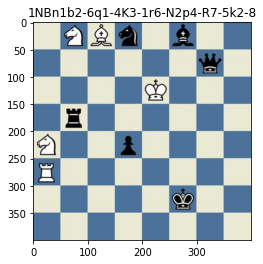

In [35]:
plt.imshow(img.imread(train[50]))
plt.title(fen_from_filename(train[50]))

Text(0.5, 1.0, '2B5-3N4-1K6-7Q-3k4-4n3-4r3-8')

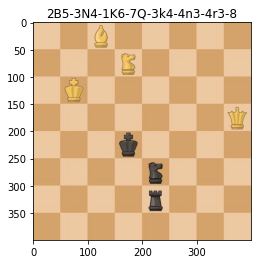

In [36]:
plt.imshow(img.imread(test[50]))
plt.title(fen_from_filename(test[50]))

Text(0.5, 1.0, '8-N3P2R-7k-2B5-5n2-4n2r-7B-2K5')

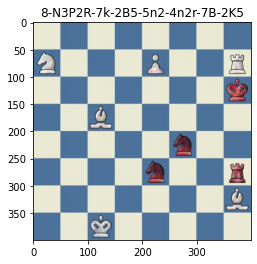

In [37]:
plt.imshow(img.imread(test[1245]))
plt.title(fen_from_filename(test[1245]))

In [43]:
fen_from_filename(test[1245])

'8-N3P2R-7k-2B5-5n2-4n2r-7B-2K5'

### Understanding the FEN/ lable notations, 

Eg 8-N3P2R-7k-2B5-5n2-4n2r-7B-2K5

starts from top

8 represents 8 empty cells

- nxt row

All CAPS letters are White All small letters are Black peices

N3P2R
N first white knight then 3 empty cells then white pawn then 2 empty cells then white Rook  

##  Data Processing/ Augumentation

### Based on the above observations,
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

images are not grayscale, images are in RGB 

RGB: The default interpretation for color images. Each pixel is made up of 3 integers between 0–255, where the integers represent the intensity of red, green, and blue, respectively, for the pixel.
https://towardsdatascience.com/image-recognition-with-machine-learning-on-python-image-processing-3abe6b158e9a

As mentioned in Kaggle, All images are 400 by 400 pixels.

Plan of action

size the images into 255 pixles

As image is a board with cells(not like cat and dog images where the images of animals can be in any part of the image like right cornerm left corner)

we dont need horizontal and vertical flips
shear_range, zoom_range are also not used

#### Encoding and decoding lables

As the lables are in string and number seperated by - format, we need to encode them
plan is to implement one hot encoding may be through a function

Also we need a function to revert back back the encoding to interpert the results

### Spliting each images into each cells for obtaining better modelling results  
#### Reason
like the below image there is only 7 peices in 64 cells of the image, we are not sure about the distribution of these low peices images so its better to split the image into 64 parts and remove the reduntant cells 

Text(0.5, 1.0, '2B5-3N4-1K6-7Q-3k4-4n3-4r3-8')

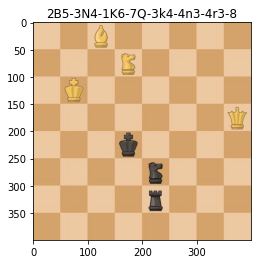

In [39]:
plt.imshow(img.imread(test[50]))
plt.title(fen_from_filename(test[50]))

###  Dimensionality Reduction

Since we are spliting and removing the reduntant conetent from each image before modeling we will end in reduced dimentions
so we would not require to do dimentionality reductionm i guess, but after analyse if it require we will implement dimentionaluity reduction 
technques to increase the model performace

### Modelization 

CNN is the proven best algorithm for image processing/classfication purposes, so we planned to implement directly a  Sequential() CNN model
with many convolution and dense layers also multiple layers of activation functions with 'relu' and dropout layers are used to avoid overfitting
and at the output layer activation function will be softmax

loss function will be categorical_crossentropy and optimizer is Adam and metric will be accuracy

### Performances 

Training and validation accuracy
Training and validation loss

Will be ploted to analyse Training acc, Validation acc, Training loss, Validation loss 